# Modeling

> In this notebook, we begin modeling on our data

### Importing and file loading

In [68]:
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Crop_recommendation.csv')
data_std = pd.read_csv('data/Crop_recommendation_standardized.csv')

In [5]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Split Data

In [53]:
train = []
test = []

split_ratio = 75
for i in range(2200):
    if i % 100 < split_ratio:
        train.append(data.iloc[i])
    else:
        test.append(data.iloc[i])

In [54]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [55]:
train_x = train_df.loc[:,"N":"rainfall"]
train_y = train_df.loc[:,"label"]
test_x = test_df.loc[:,"N":"rainfall"]
test_y = test_df.loc[:,"label"]

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2170,114,20,26,25.556567,62.670878,7.279057,193.586623
2171,117,26,30,27.923744,67.969109,7.079851,115.232553
2172,111,29,31,26.059684,52.310985,6.136287,161.343254
2173,119,30,28,26.357709,64.575780,6.505204,163.626950


In [69]:
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.8945454545454545

In [70]:
clf.score(test_x, test_y)

0.8945454545454545

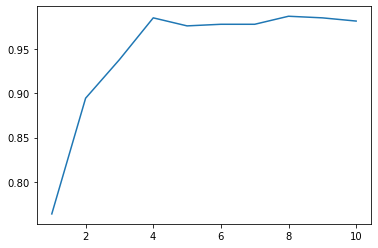

In [72]:
depths = [i+1 for i in range(10)]
acc = []
for d in depths:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(train_x, train_y)
    acc.append(clf.score(test_x, test_y))
plt.plot(depths,acc)

In [99]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.9854545454545455

In [97]:
sample = np.reshape([90,42,43,20.9,82,6.5,203],(1, -1))
clf.predict_log_proba(sample)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [88]:
import pickle
filename = "model.sav"
pickle.dump(clf, open(filename, 'wb'))